# **TITLE: MACHINE LEARNING MODEL ON STUDENT PERFORMANCE ANALYSIS**

# NAME: SIDDHARTH M
# DEPARTMENT: ARTIFICIAL INTELLIGENCE AND DATA SCIENCE
# YEAR: III-YEAR

# Problem Statement:
Educational institutions are looking to improve student performance by understanding the key factors that influence academic outcomes. Given a variety of behavioral, academic, and lifestyle attributes, can we predict a student's final grade?

# Objective:
To predict the final grade of student based on performance reports.

# Import necessary libraries

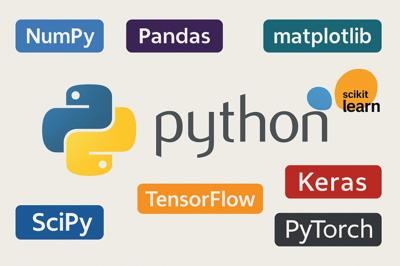

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score,precision_score,recall_score


# Load the dataset

In [5]:
# Load the dataset
data = pd.read_csv("student_performance_large_dataset.csv")
data.head(10)

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
5,S00006,28,Female,26,Kinesthetic,5,Yes,63,54,80,No,High,25,8,D
6,S00007,19,Female,49,Reading/Writing,13,Yes,91,44,66,Yes,Low,30,10,D
7,S00008,27,Male,14,Reading/Writing,5,Yes,88,56,76,Yes,Low,4,6,C
8,S00009,22,Male,45,Visual,16,No,52,78,70,No,Low,26,9,B
9,S00010,28,Other,35,Auditory,7,No,100,55,100,No,Medium,5,9,C


# Convert the data into dataframe

In [6]:
# convert data into dataframe
df=pd.DataFrame(data)
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


# Information about the dataset

In [7]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

# Shape of the dataset

In [8]:
# Shape of the dataset
df.shape

(10000, 15)

# FInd the no of columns in the dataset

In [9]:
# Find the no of columns in the dataset
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade'],
      dtype='object')

# Describe the data

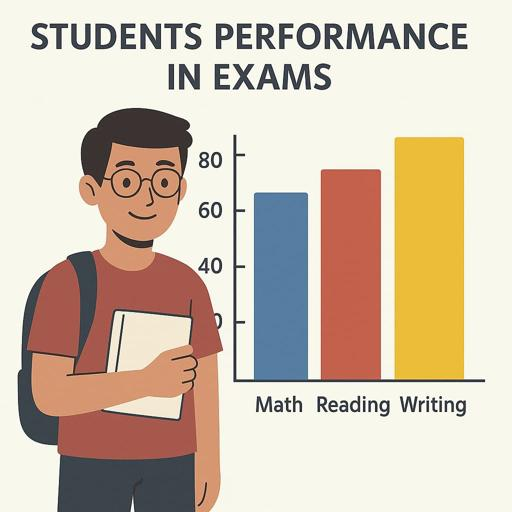

In [10]:
# Describe the data
df.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


# Handle missing values

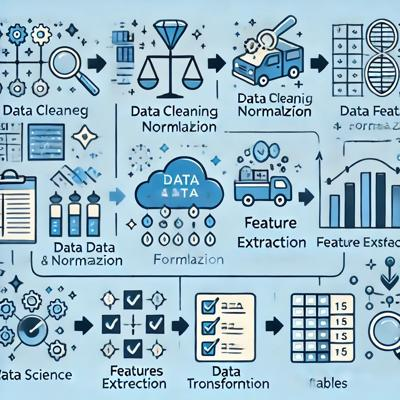

In [11]:
# Handle missing values
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Study_Hours_per_Week,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0
Attendance_Rate (%),0


# Handling duplicates

In [12]:
# Handling duplicates
df.duplicated().sum()

np.int64(0)

# Assigning independent variables to x and target variable to y

In [13]:
# Assigning independent variables to x and target variable to y
x=df.drop("Final_Grade",axis=1)
y=df["Final_Grade"]
x

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8


# Encoding the target variable into numerical

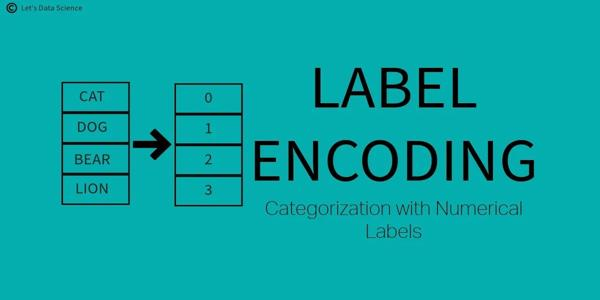

In [14]:
# Encoding the target variable into numerical
le=LabelEncoder()
y=le.fit_transform(y)
y

array([2, 3, 3, ..., 3, 3, 3])

## Encoding the independent variable into numerical

In [15]:
#Encoding the independent variable into numerical
oh = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Use the original DataFrame 'df' instead of 'x'
encoded_data = oh.fit_transform(df[['Gender','Preferred_Learning_Style','Participation_in_Discussions','Use_of_Educational_Tech','Self_Reported_Stress_Level']])
# Create DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_data, columns=oh.get_feature_names_out(['Gender','Preferred_Learning_Style','Participation_in_Discussions','Use_of_Educational_Tech','Self_Reported_Stress_Level']))
df2=encoded_df
df2

,Gender_Female,Gender_Male,Gender_Other,Preferred_Learning_Style_Auditory,Preferred_Learning_Style_Kinesthetic,Preferred_Learning_Style_Reading/Writing,Preferred_Learning_Style_Visual,Participation_in_Discussions_No,Participation_in_Discussions_Yes,Use_of_Educational_Tech_No,Use_of_Educational_Tech_Yes,Self_Reported_Stress_Level_High,Self_Reported_Stress_Level_Low,Self_Reported_Stress_Level_Medium
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Concat encoded columns with int and float columns

In [16]:
#concat encoded columns with int and float columns
remaining_x = df.drop(['Gender','Preferred_Learning_Style','Participation_in_Discussions','Use_of_Educational_Tech','Self_Reported_Stress_Level'], axis=1)
x = pd.concat([ encoded_df,remaining_x], axis=1)
x

,Gender_Female,Gender_Male,Gender_Other,Preferred_Learning_Style_Auditory,Preferred_Learning_Style_Kinesthetic,Preferred_Learning_Style_Reading/Writing,Preferred_Learning_Style_Visual,Participation_in_Discussions_No,Participation_in_Discussions_Yes,Use_of_Educational_Tech_No,...,Student_ID,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,S00001,18,48,14,100,69,66,9,8,C
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,S00002,29,30,20,71,40,57,28,8,D
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,S00003,20,47,11,60,43,79,13,7,D
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,S00004,23,13,0,63,70,60,24,10,B
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,S00005,19,24,19,59,63,93,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,S09996,20,30,6,62,58,76,17,6,C
9996,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,S09997,23,16,8,54,84,86,6,5,B
9997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,S09998,26,23,3,54,40,70,20,8,D
9998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,S09999,18,41,7,66,45,90,6,8,D


# Handling Outliers

## Finding outliers for Age using boxplot

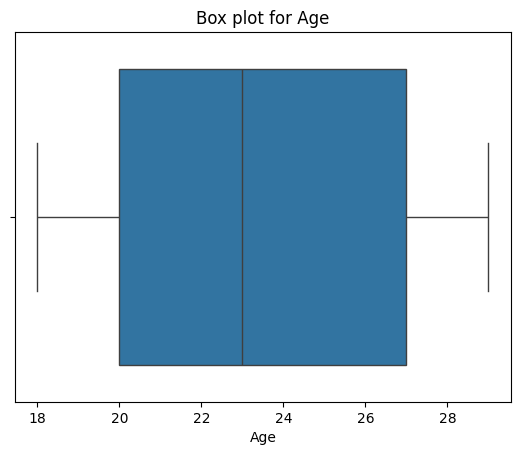

In [17]:
#Finding outliers for Age using boxplot
sns.boxplot(x=df["Age"])
plt.title("Box plot for Age")
plt.show()

# Finding outliers for Study_Hours_per_Week using boxplot

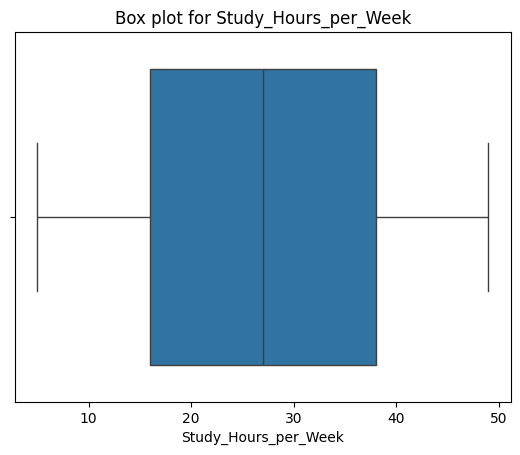

In [18]:
#Finding outliers for Study_Hours_per_Week using boxplot
sns.boxplot(x=df["Study_Hours_per_Week"])
plt.title("Box plot for Study_Hours_per_Week")
plt.show()

## Finding outliers for Online_Courses_Completed using boxplot

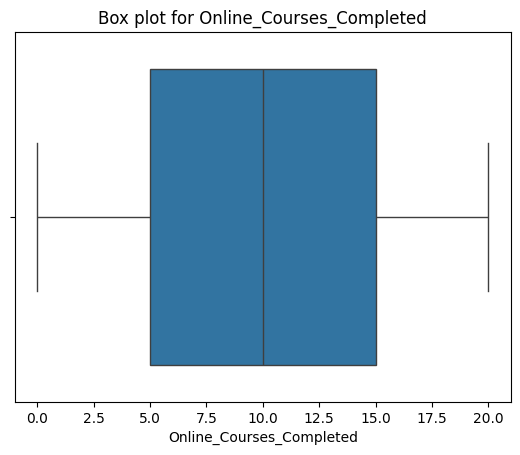

In [19]:
#Finding outliers for Online_Courses_Completed using boxplot
sns.boxplot(x=df["Online_Courses_Completed"])
plt.title("Box plot for Online_Courses_Completed")
plt.show()

# Finding outliers for Assignment_Completion_Rate using boxplot

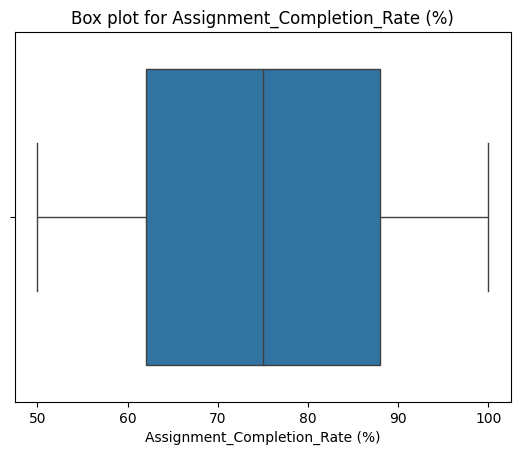

In [20]:
#Finding outliers for Assignment_Completion_Rate using boxplot
sns.boxplot(x=df["Assignment_Completion_Rate (%)"])
plt.title("Box plot for Assignment_Completion_Rate (%)")
plt.show()

# Finding outliers for Exam_Score (%) using boxplot

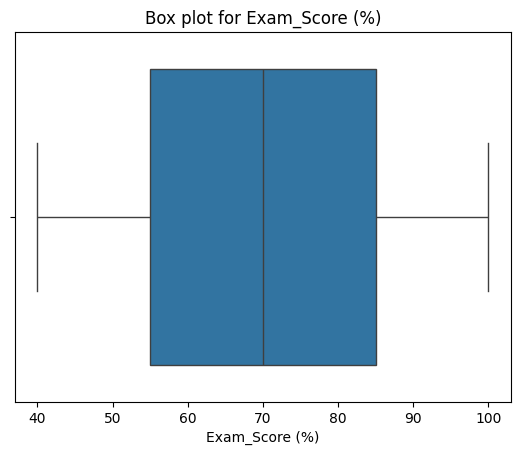

In [21]:
#Finding outliers for Exam_Score (%) using boxplot
sns.boxplot(x=df["Exam_Score (%)"])
plt.title("Box plot for Exam_Score (%)")
plt.show()

# Finding outliers for Attendance_Rate (%)	using boxplot

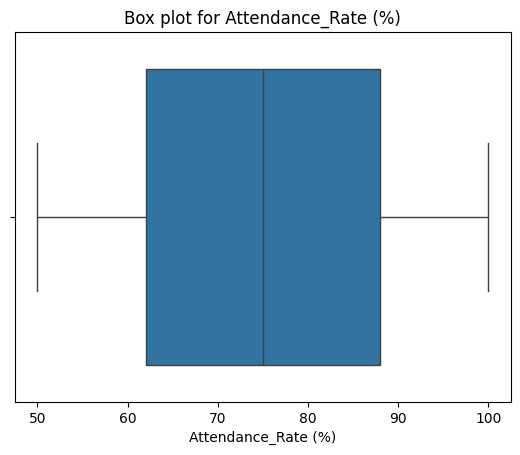

In [22]:
#Finding outliers for Attendance_Rate (%)	using boxplot
sns.boxplot(x=df["Attendance_Rate (%)"])
plt.title("Box plot for Attendance_Rate (%)")
plt.show()

# Finding outliers for Time_Spent_on_Social_Media (hours/week) using boxplot

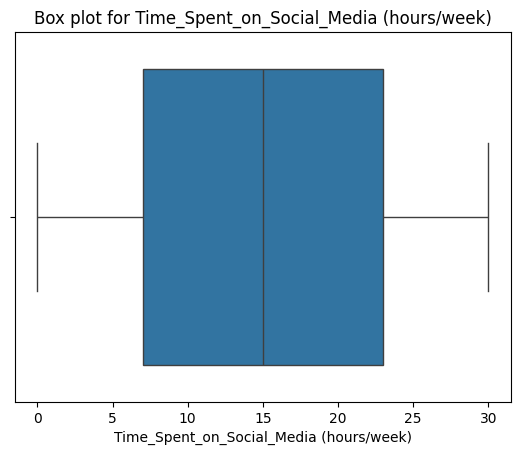

In [23]:
#Finding outliers for Time_Spent_on_Social_Media (hours/week) using boxplot
sns.boxplot(x=df["Time_Spent_on_Social_Media (hours/week)"])
plt.title("Box plot for Time_Spent_on_Social_Media (hours/week)")
plt.show()


# Finding outliers for Sleep_Hours_per_Night using boxplot

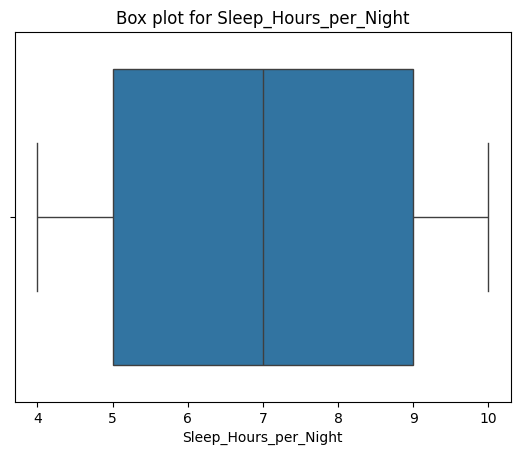

In [24]:
#Finding outliers for Sleep_Hours_per_Night using boxplot
sns.boxplot(x=df["Sleep_Hours_per_Night"])
plt.title("Box plot for Sleep_Hours_per_Night")
plt.show()

# Box plot for numerical columns on independent (x) variables

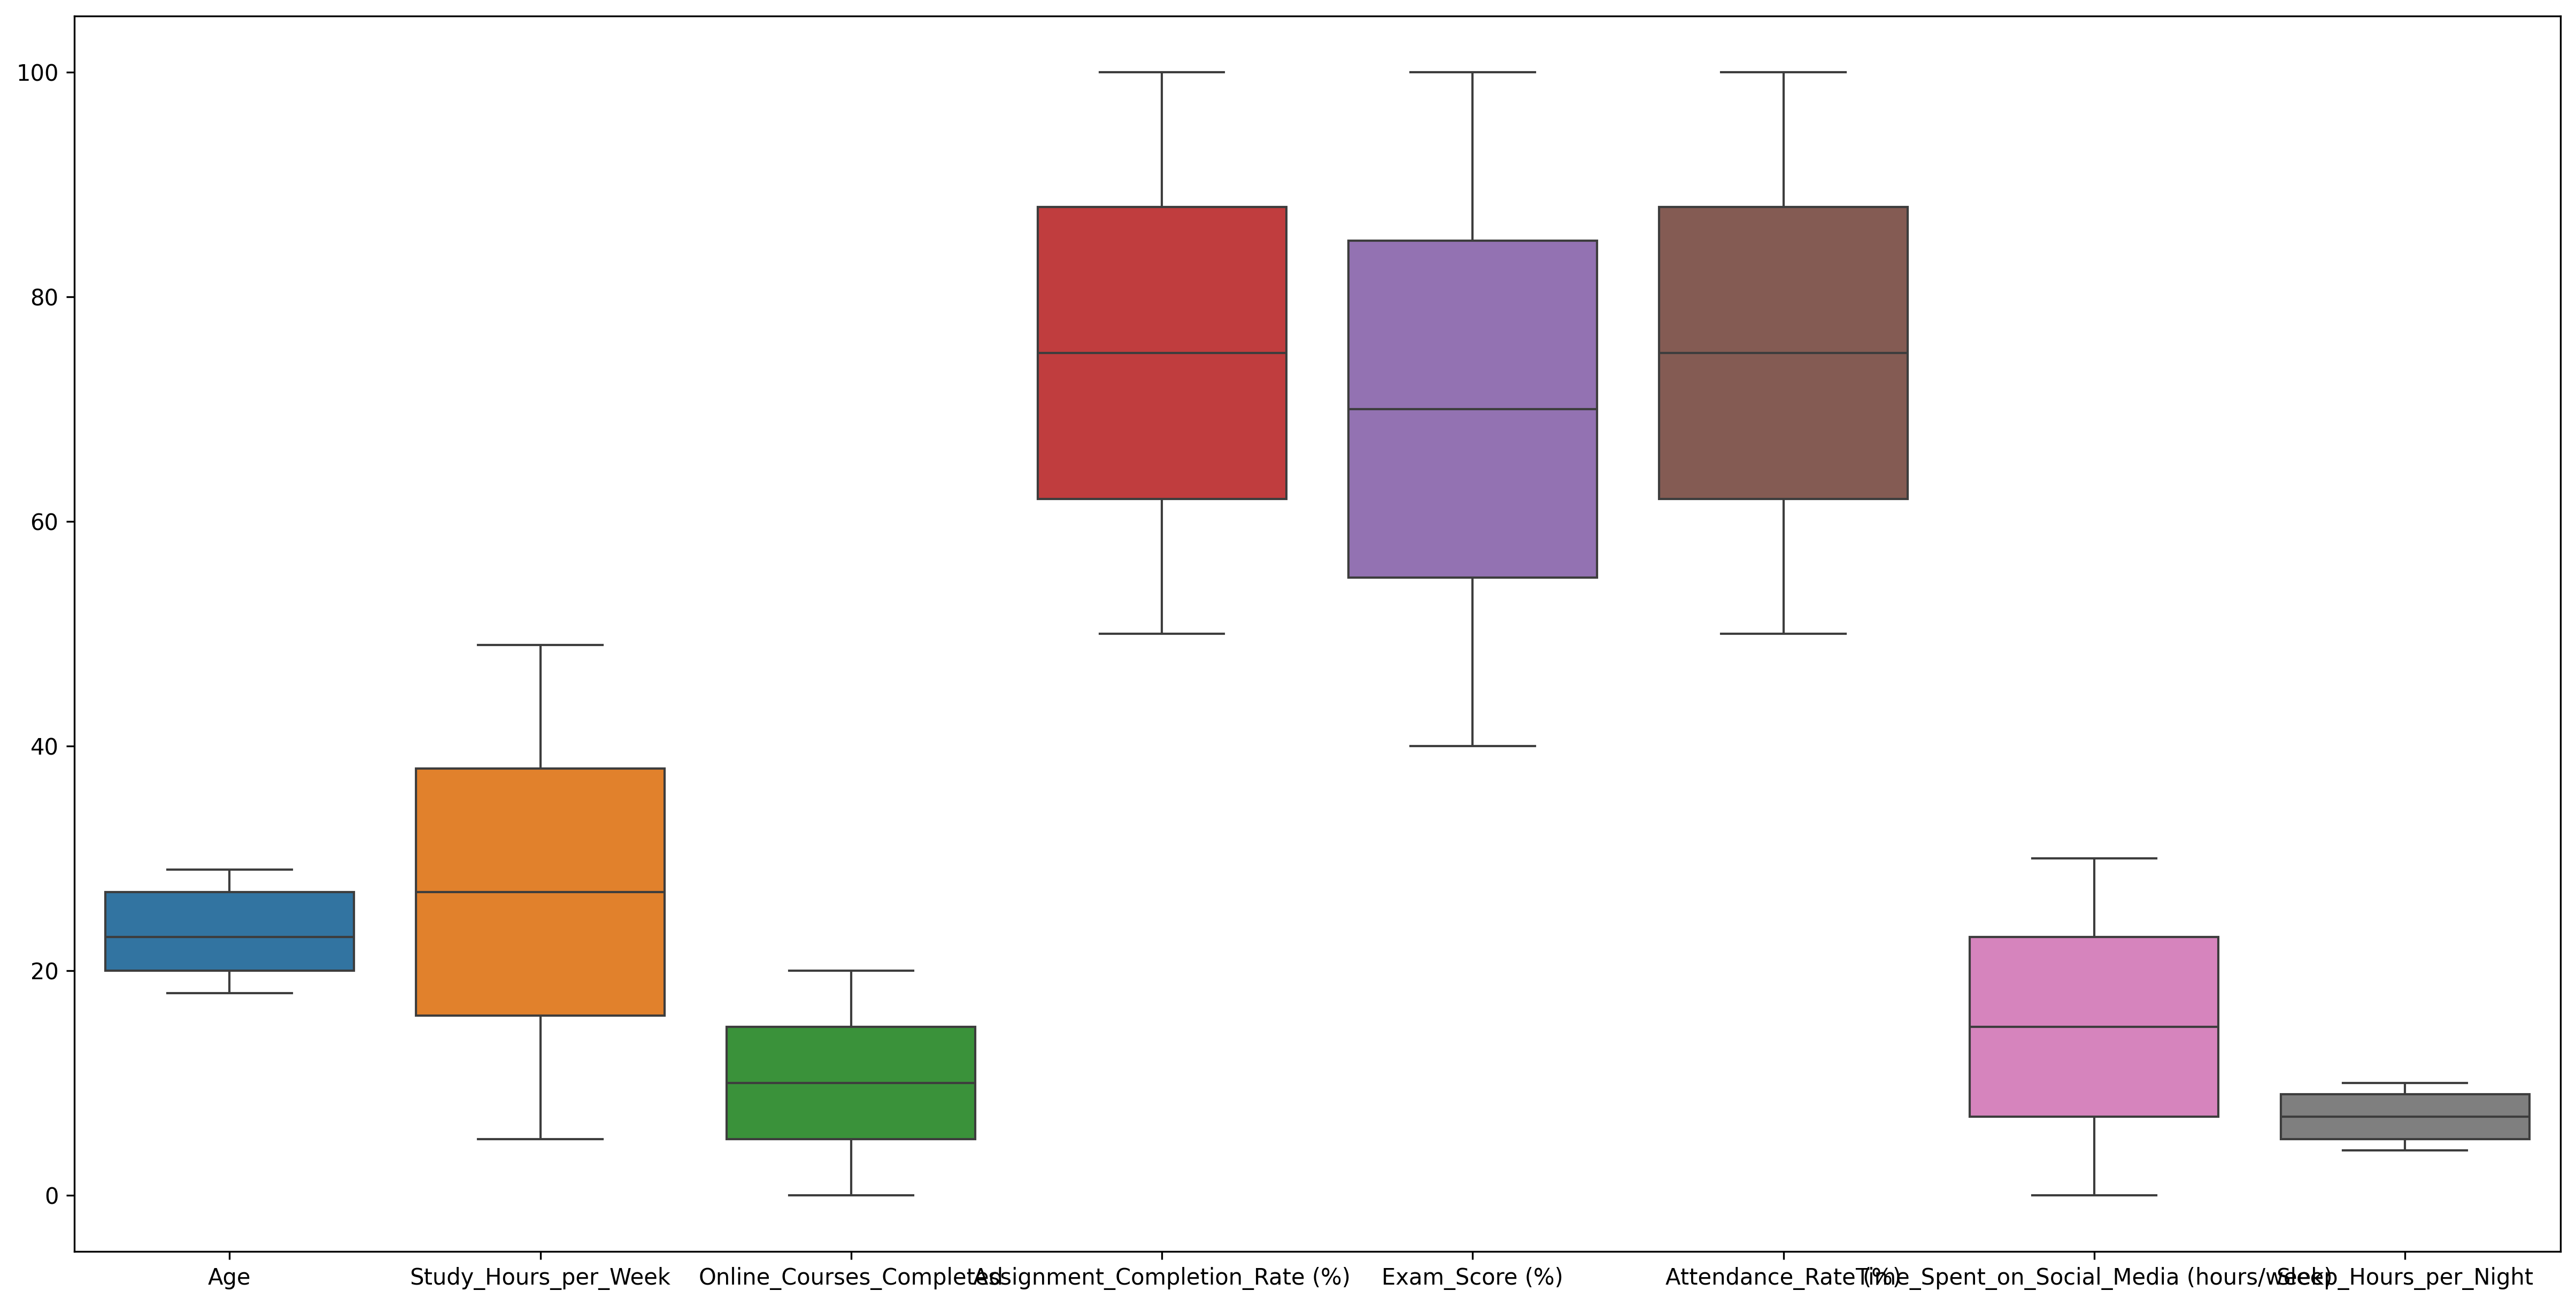

In [25]:
#Box plot for numerical columns on independent (x) variables
lst=df[['Age','Study_Hours_per_Week','Online_Courses_Completed','Assignment_Completion_Rate (%)','Exam_Score (%)','Attendance_Rate (%)','Time_Spent_on_Social_Media (hours/week)','Sleep_Hours_per_Night']]
plt.figure(figsize=(20,10),dpi=300)
sns.boxplot(data=lst)
plt.show()

# Heat Map for independent variables(x)

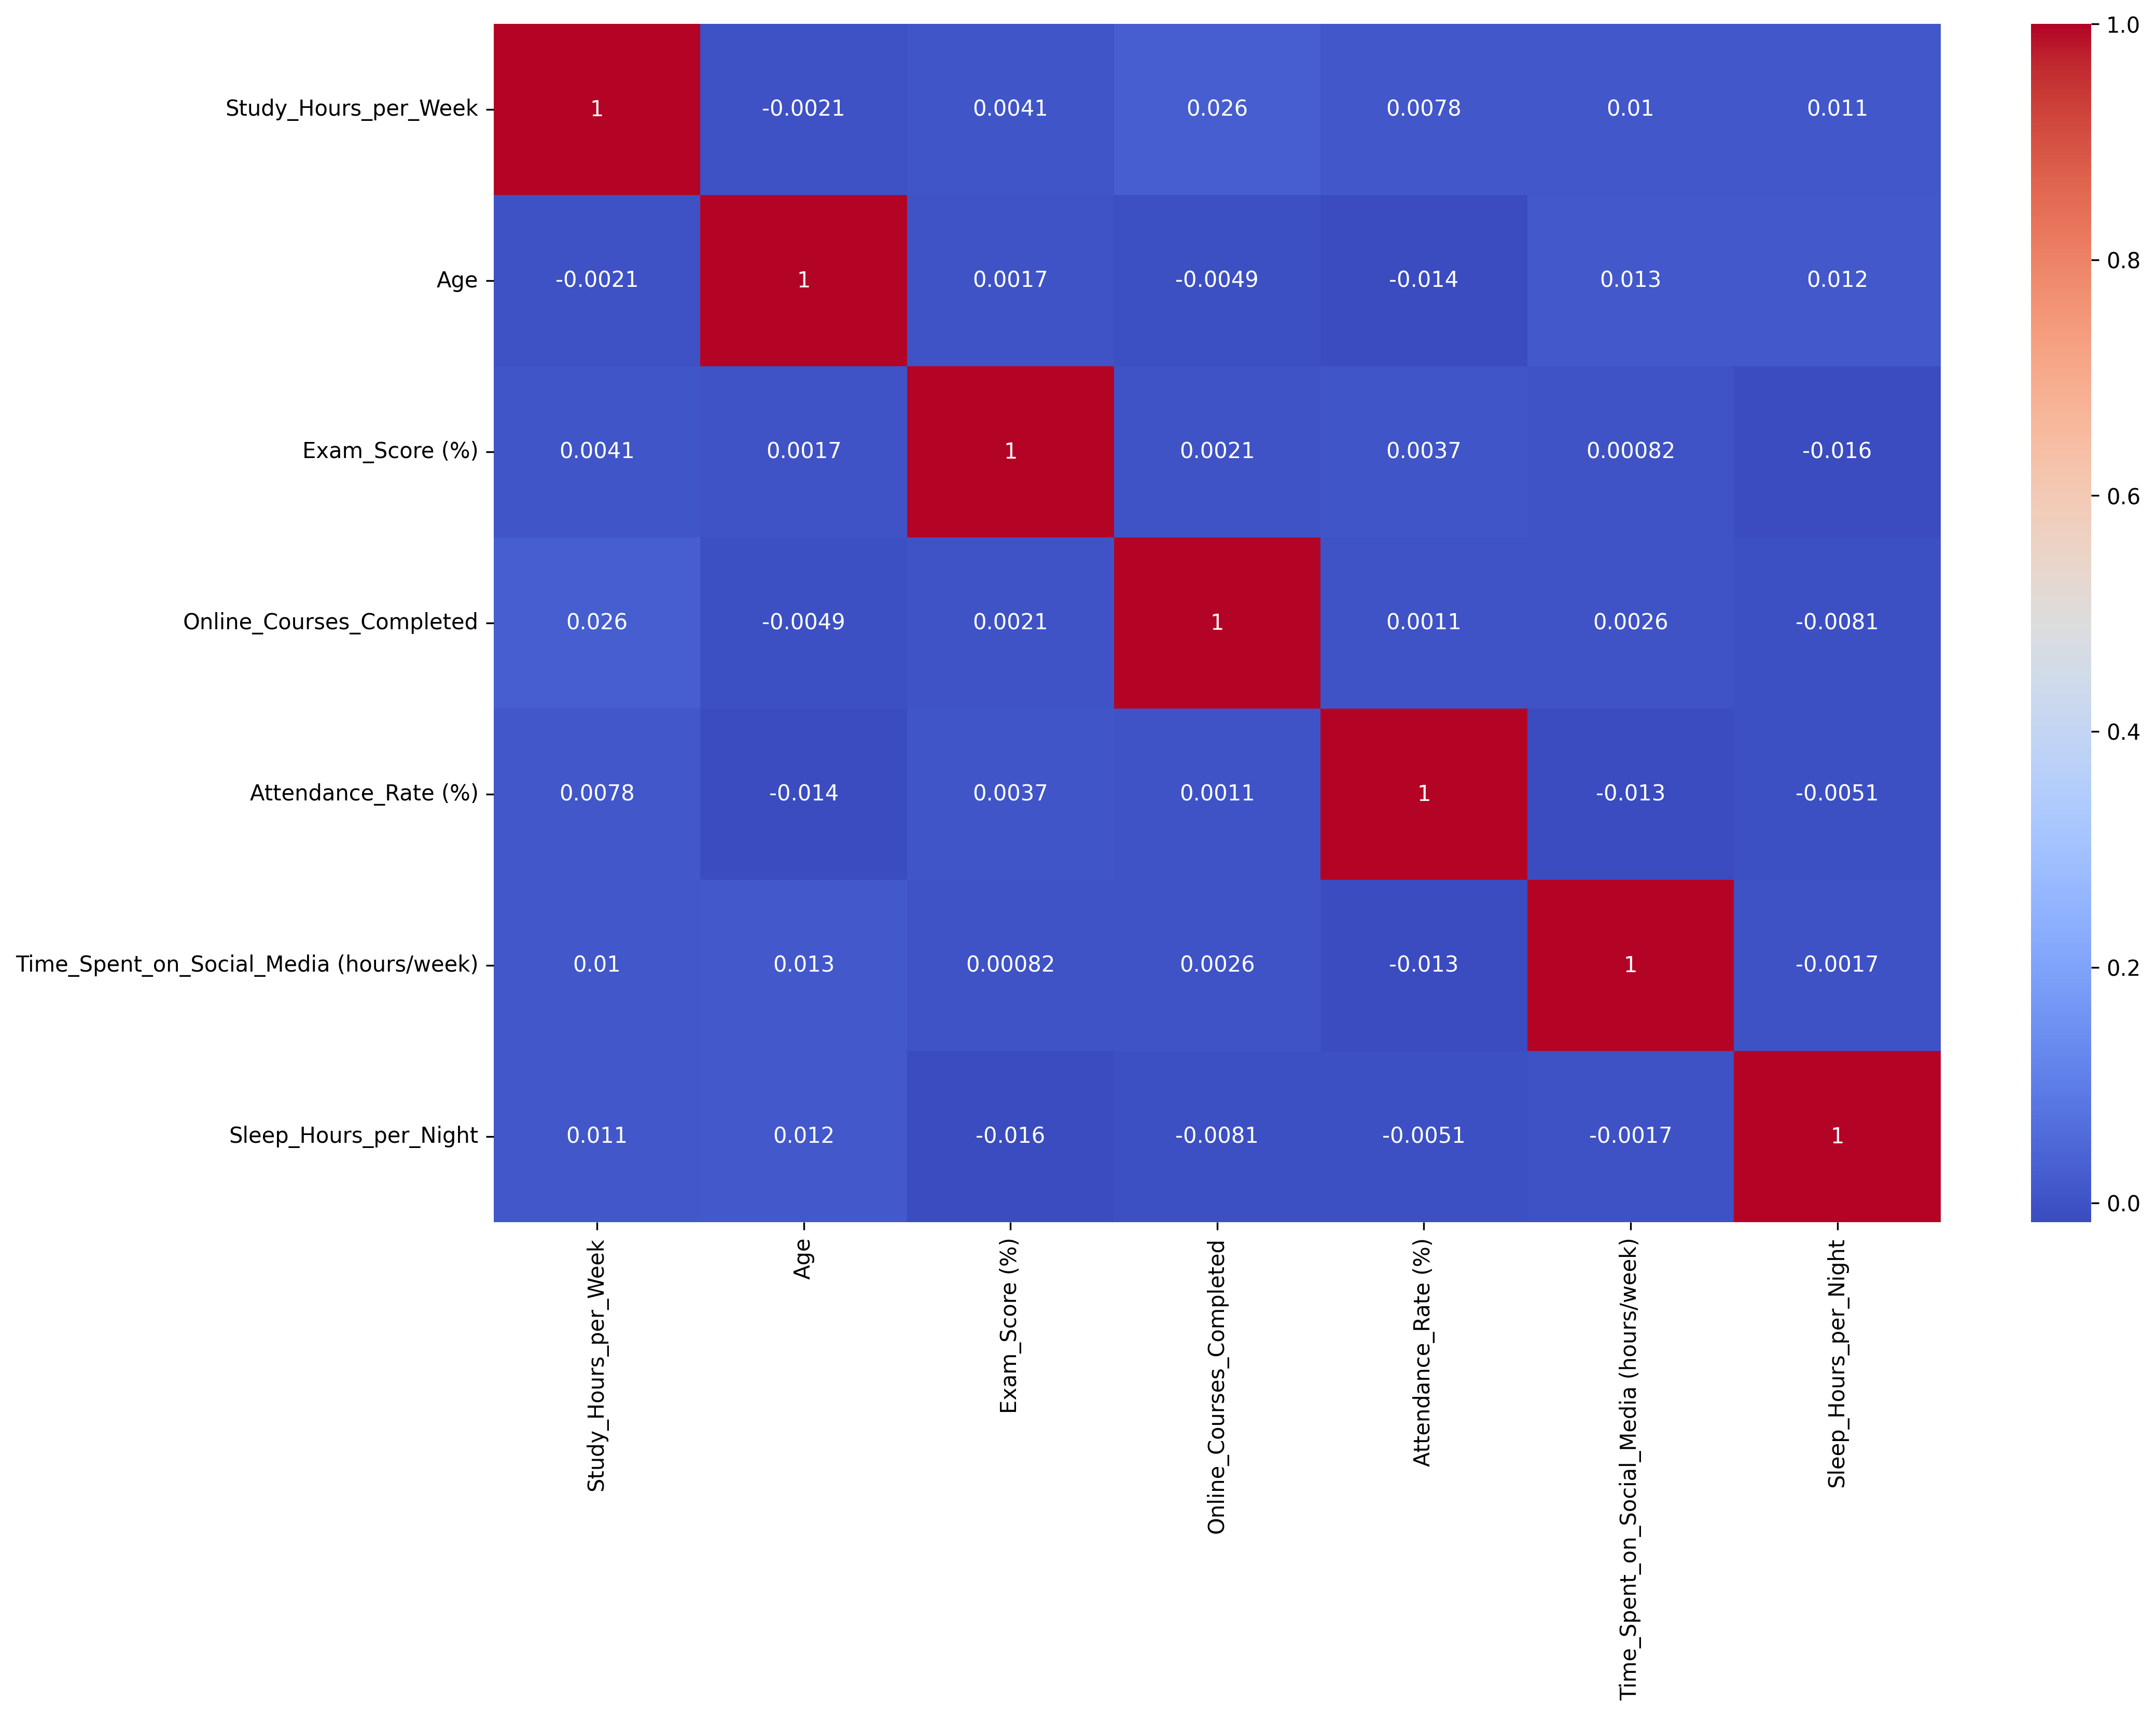

In [26]:
#Heat Map for independent variables(x)
df3=df[['Study_Hours_per_Week','Age','Exam_Score (%)','Online_Courses_Completed','Attendance_Rate (%)','Time_Spent_on_Social_Media (hours/week)','Sleep_Hours_per_Night']]
plt.figure(figsize=(15,10),dpi=300)
sns.heatmap(df3.corr(),annot=True,cmap='coolwarm')
plt.show()


# Kde plot using Histogram

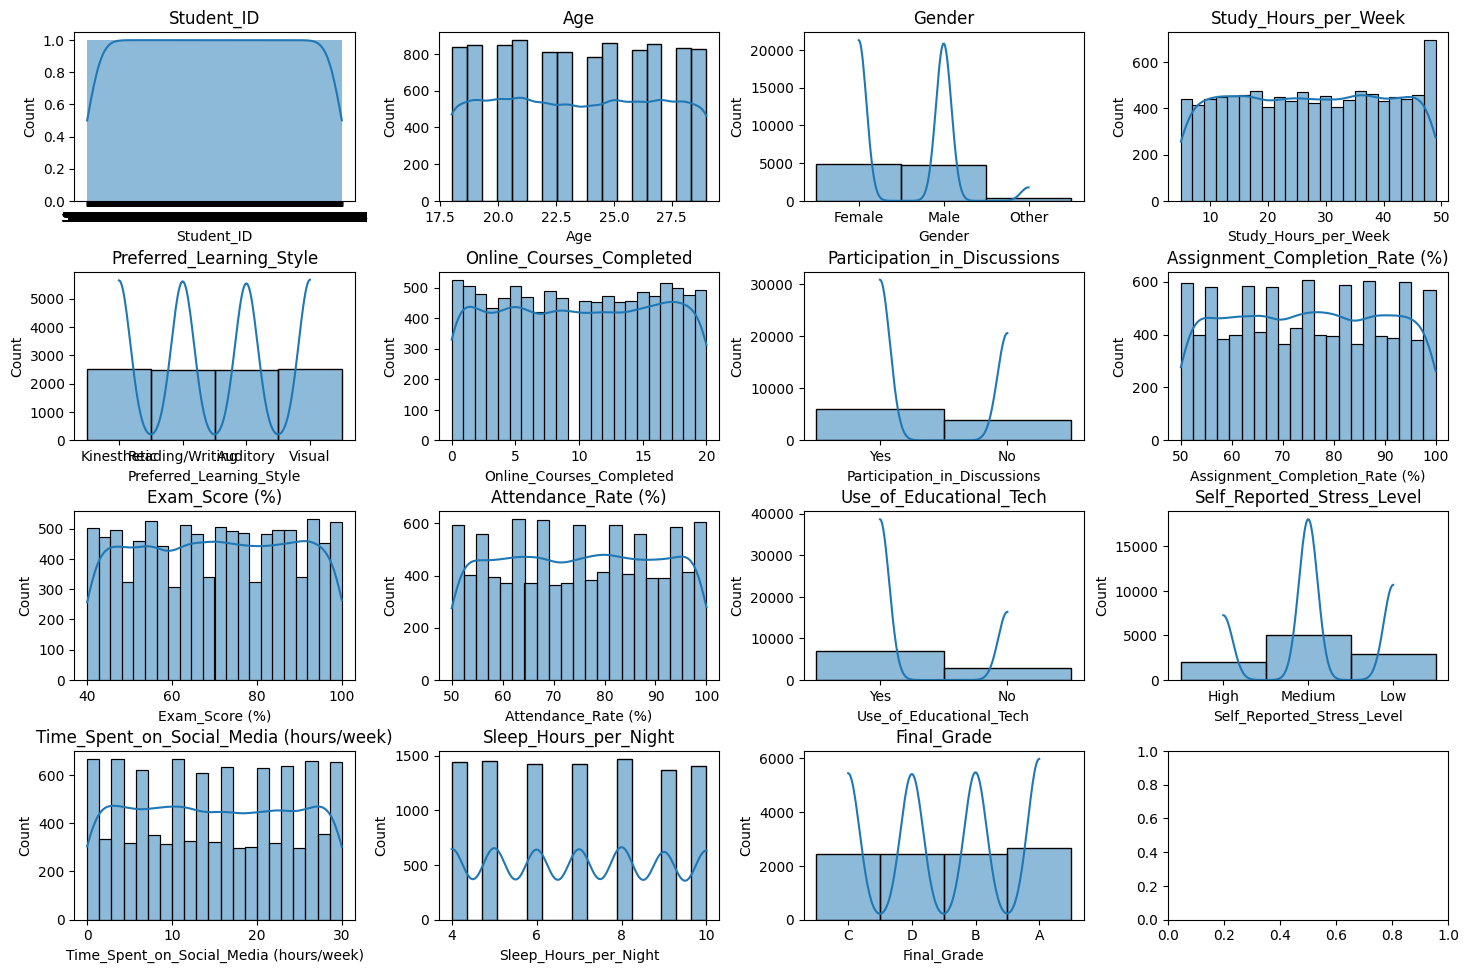

In [27]:
#kde plot using Histogram
fix,ax=plt.subplots(4,4,figsize=(15,10))
fix.tight_layout(pad=3.0)
for i,col in enumerate(df.columns):
    row=i//4
    col_num=i%4
    sns.histplot(data=df,x=col,kde=True,ax=ax[row,col_num])
    ax[row,col_num].set_title(col)
plt.show()

# Scatter plot

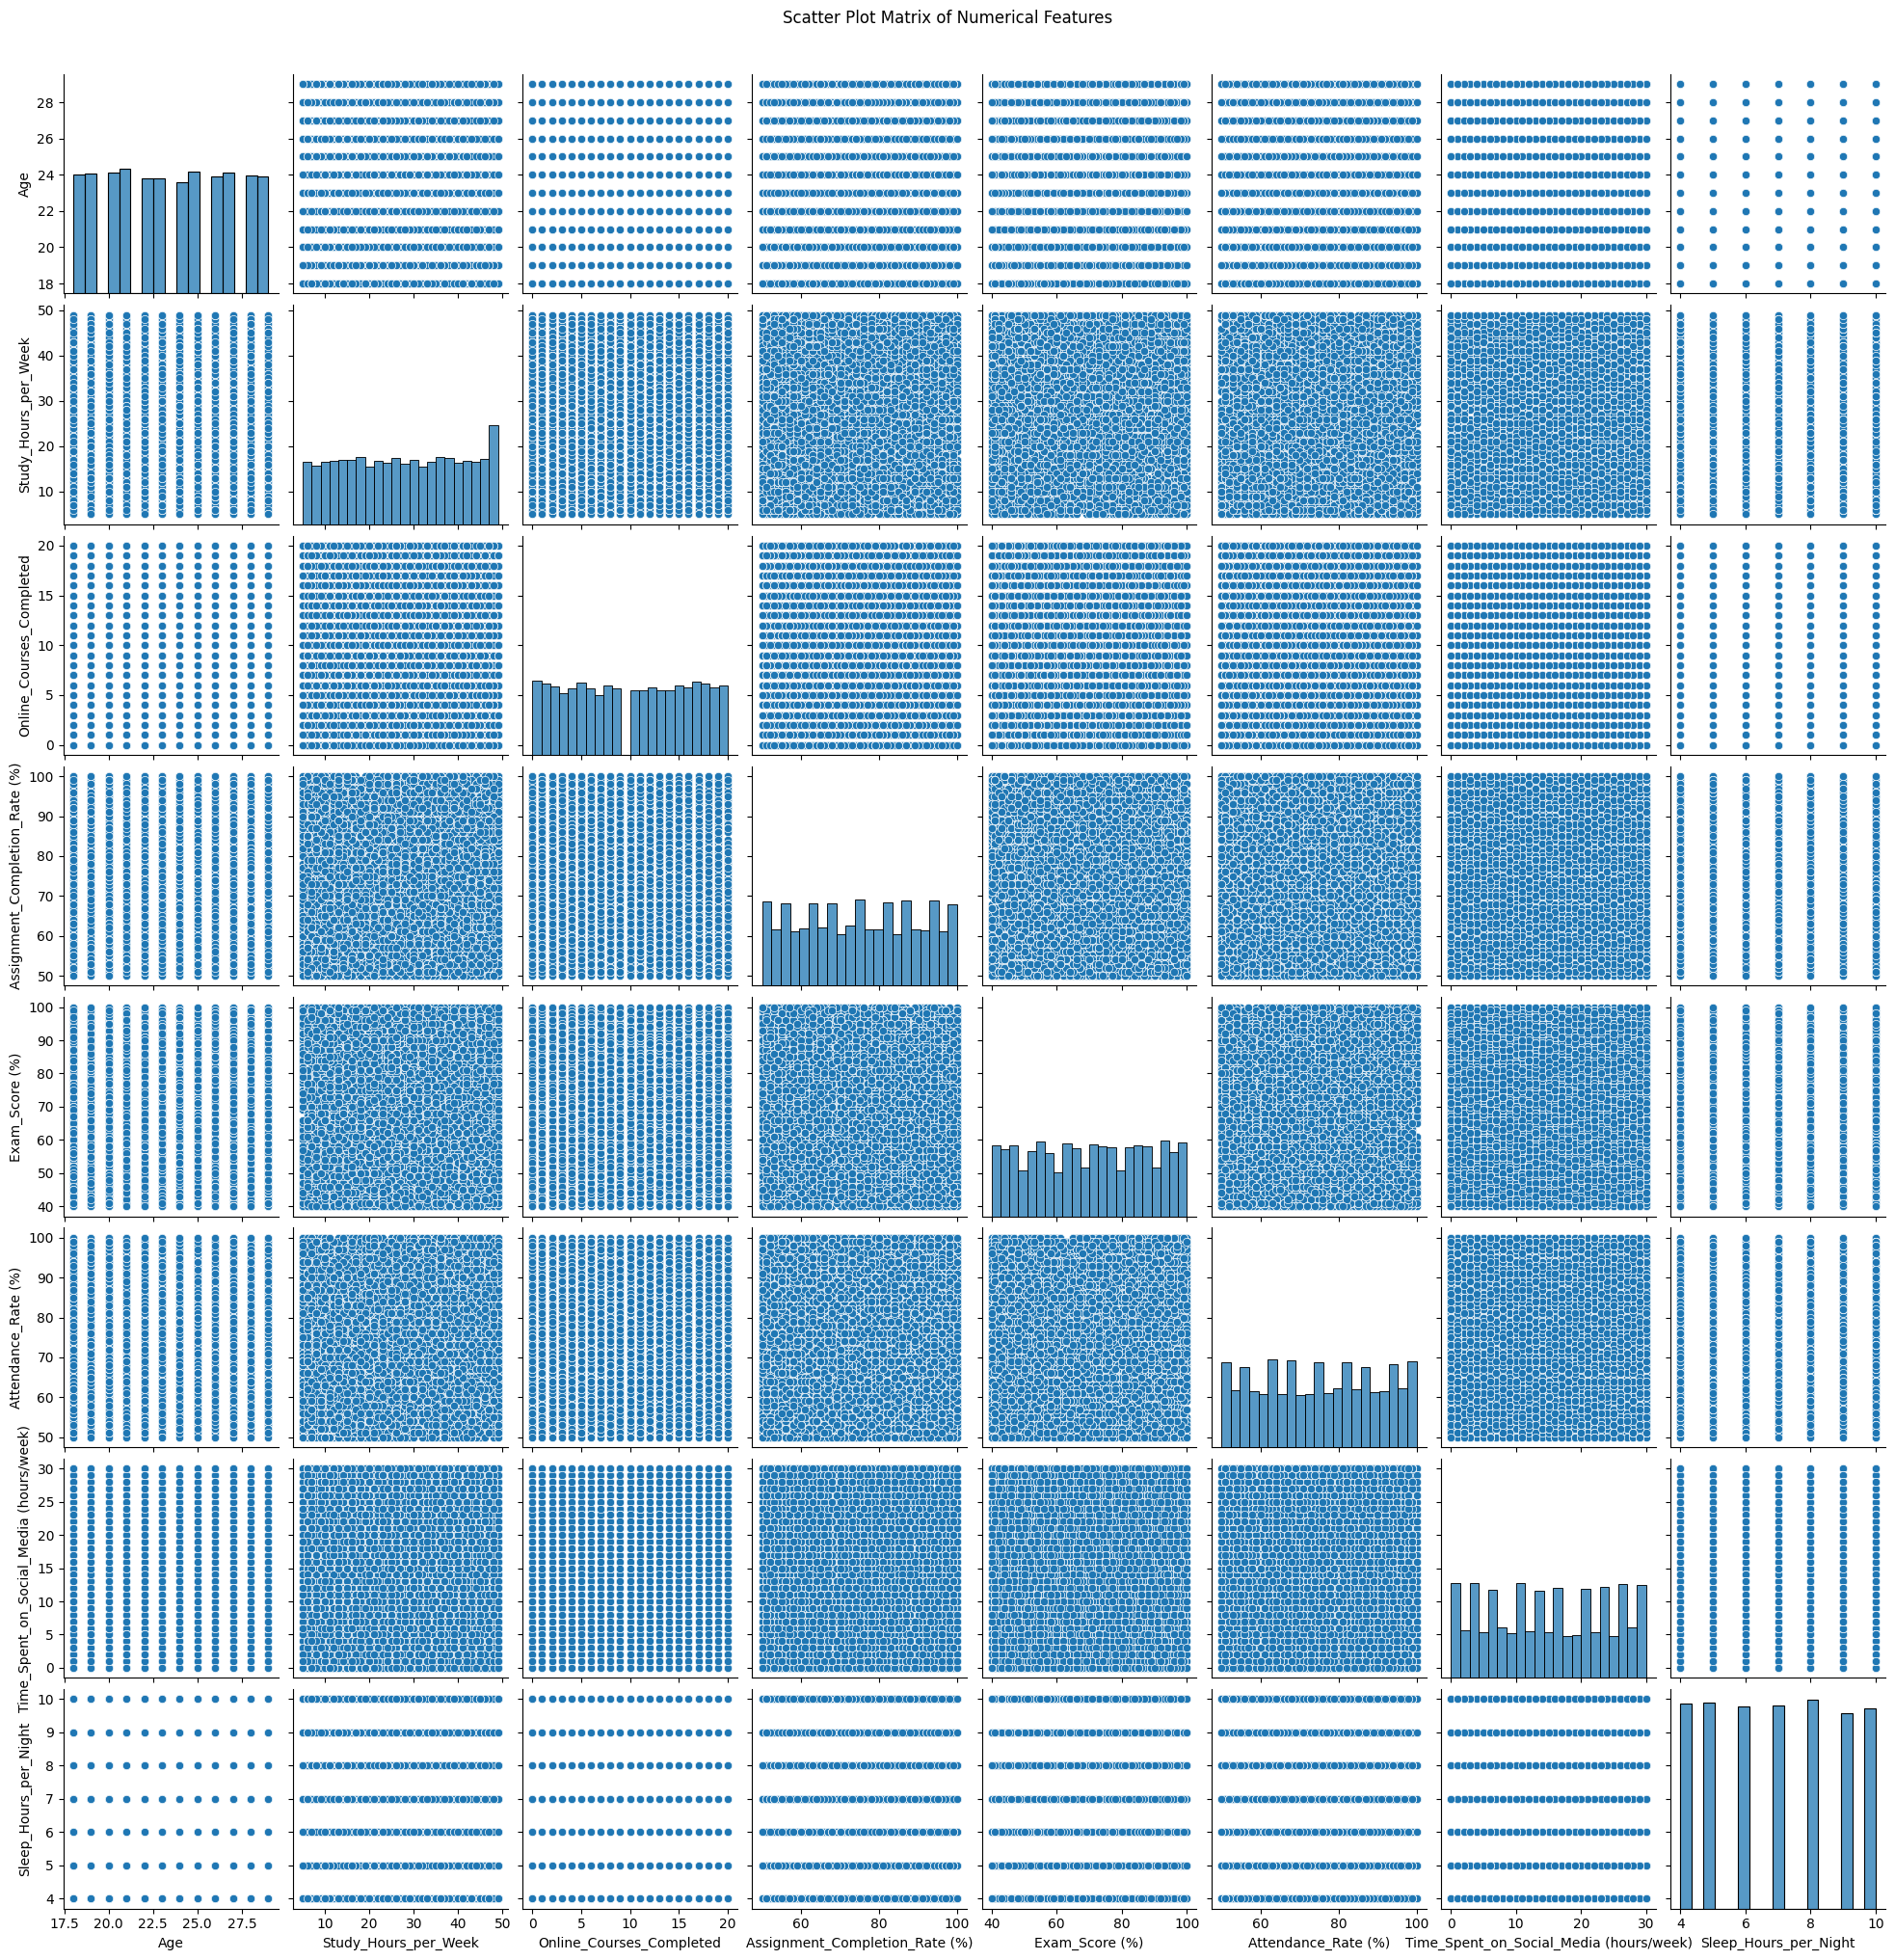

In [28]:
#Scatter plot
sns.pairplot(df.select_dtypes(include=['number']))
plt.suptitle('Scatter Plot Matrix of Numerical Features', y=1.02)
plt.show()

# Pie chart

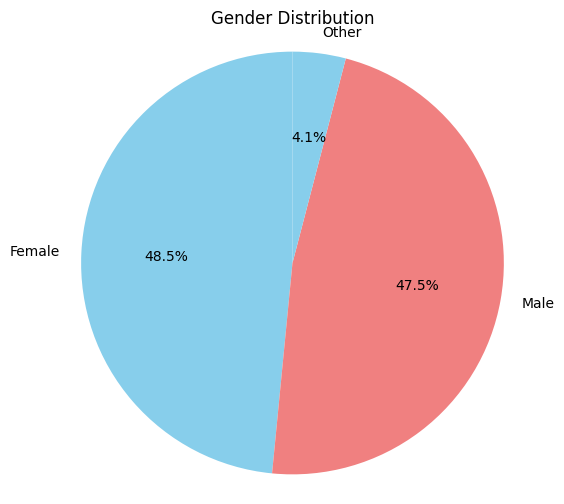

In [29]:
#Pie chart
gender_counts = df['Gender'].value_counts()
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

# Skew

In [30]:
#Skew
df2.skew()

,0
Gender_Female,0.061638
Gender_Male,0.100943
Gender_Other,4.656110
Preferred_Learning_Style_Auditory,1.175960
Preferred_Learning_Style_Kinesthetic,1.146887
Preferred_Learning_Style_Reading/Writing,1.156106
Preferred_Learning_Style_Visual,1.140772
Participation_in_Discussions_No,0.406609
Participation_in_Discussions_Yes,-0.406609
Use_of_Educational_Tech_No,0.884471


In [35]:
x=df2
y=y

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [40]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Select top 15 features
'''selector = SelectKBest(score_func=f_classif, k=15)
x_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
selector_scores = selector.scores_'''
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=20)
x_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
selector_scores = selector.scores_

# Feature scores DataFrame
feature_score = pd.DataFrame({'features': x.columns, 'score': selector_scores})
feature_score = feature_score.sort_values(by='score', ascending=False)
print(feature_score)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Model Training and Evaluation
for name, clf in classifiers.items():
    clf.fit(x_train_scaled, y_train)
    y_pred = clf.predict(x_test_scaled)

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=14. All the features will be returned.
  warnings.warn(


                                    features     score
5   Preferred_Learning_Style_Reading/Writing  0.007076
3          Preferred_Learning_Style_Auditory  0.004675
2                               Gender_Other  0.001824
0                              Gender_Female  0.001567
4       Preferred_Learning_Style_Kinesthetic  0.001054
1                                Gender_Male  0.000000
6            Preferred_Learning_Style_Visual  0.000000
7            Participation_in_Discussions_No  0.000000
8           Participation_in_Discussions_Yes  0.000000
9                 Use_of_Educational_Tech_No  0.000000
10               Use_of_Educational_Tech_Yes  0.000000
11           Self_Reported_Stress_Level_High  0.000000
12            Self_Reported_Stress_Level_Low  0.000000
13         Self_Reported_Stress_Level_Medium  0.000000

Logistic Regression Results:
Accuracy: 0.2448
Precision: 0.1769640425603672
Recall: 0.2448
F1 Score: 0.17708179202752058

Confusion Matrix:
[[458 109  94   0]
 [449  72  85  